# Landing Page Analysis: Which Web Presentation Engages Users More?

## Key Question:
**Do users spend more time on Landing Page B compared to Landing Page A, indicating higher engagement and better selling potential?**


In [156]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/landing-page-ab-testing-dataset/web_page_data.csv


In [157]:
data = pd.read_csv("/kaggle/input/landing-page-ab-testing-dataset/web_page_data.csv")
display(data.head())

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


In [158]:
# Convert to seconds
data['seconds'] = data['Time'] * 60
data.head()


,Page,Time,seconds
0,Page A,0.21,12.6
1,Page B,2.53,151.8
2,Page A,0.35,21.0
3,Page B,0.71,42.6
4,Page A,0.67,40.2


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Page     36 non-null     object 
 1   Time     36 non-null     float64
 2   seconds  36 non-null     float64
dtypes: float64(2), object(1)
memory usage: 996.0+ bytes


In [160]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,36.0,1.411944,0.942407,0.21,0.7025,1.18,1.9925,3.57
seconds,36.0,84.716667,56.544402,12.60,42.1500,70.80,119.5500,214.20


In [161]:
data.isna().sum()

Page       0
Time       0
seconds    0
dtype: int64

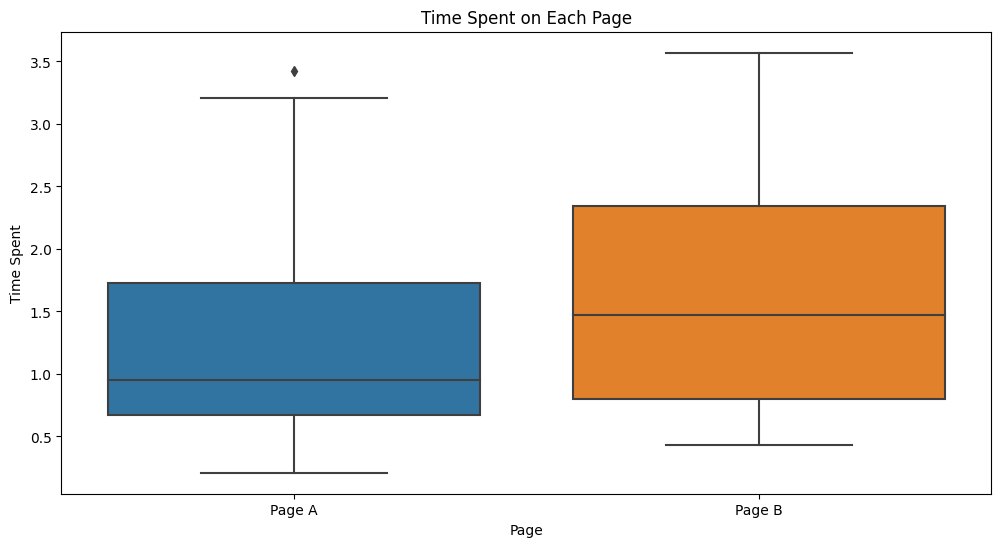

In [162]:
# Box plots to visualize the distribution of time spent on each page
plt.figure(figsize=(12, 6))
sns.boxplot(x='Page', y='Time', data=data)
plt.title('Time Spent on Each Page')
plt.xlabel('Page')
plt.ylabel('Time Spent')
plt.show()

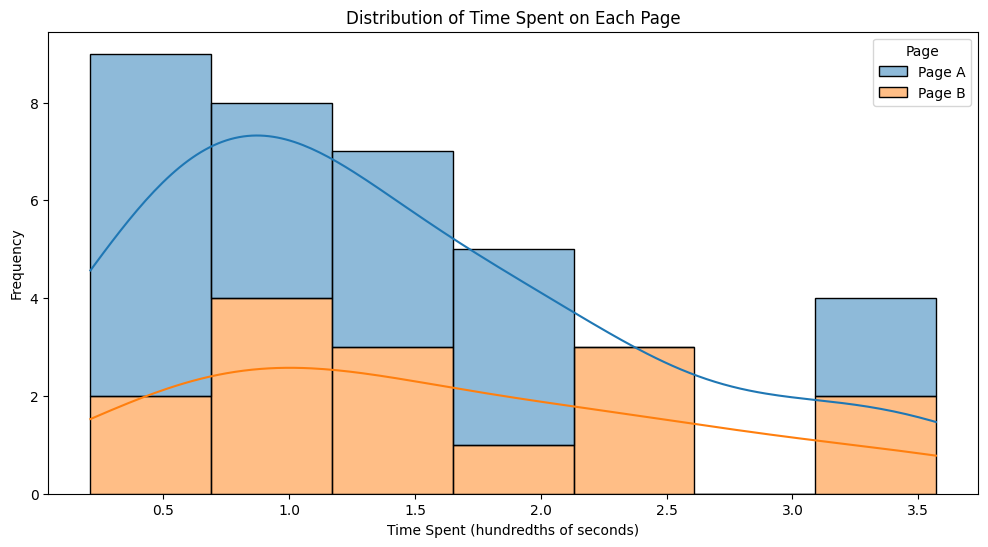

In [163]:
# Histograms to visualize the distribution of time spent on each page
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Time', hue='Page', kde=True, multiple='stack')
plt.title('Distribution of Time Spent on Each Page')
plt.xlabel('Time Spent (hundredths of seconds)')
plt.ylabel('Frequency')
plt.show()

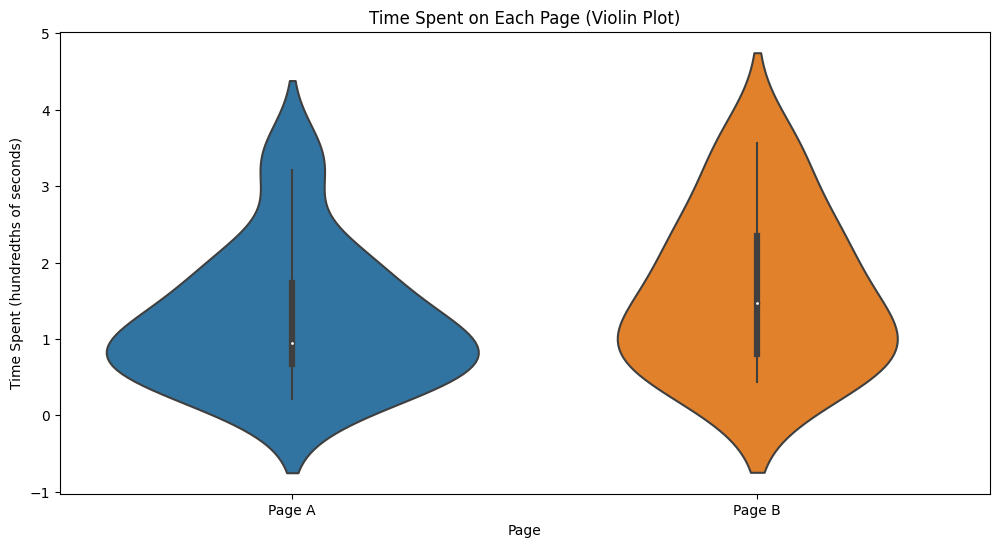

In [164]:
# Violin plot to visualize the distribution of time spent on each page
plt.figure(figsize=(12, 6))
sns.violinplot(x='Page', y='Time', data=data)
plt.title('Time Spent on Each Page (Violin Plot)')
plt.xlabel('Page')
plt.ylabel('Time Spent (hundredths of seconds)')
plt.show()

# Hypothesis Testing

## Normality Test

$H_{0}$: The data is normally distributed.

$H_{1}$: The data is not normally distributed.

In [165]:
data["Page"].value_counts()

Page
Page A    21
Page B    15
Name: count, dtype: int64

In [166]:
page_A = data[data['Page'] == 'Page A']['seconds']
page_B = data[data['Page'] == 'Page B']['seconds']

print(page_A.head(), "\n", page_B.head())

0     12.6
2     21.0
4     40.2
6    126.6
8     79.2
Name: seconds, dtype: float64 
 1    151.8
3     42.6
5     51.0
7    147.6
9     89.4
Name: seconds, dtype: float64


In [167]:
# Function to test normality
def check_normality(group_name, data):
    stat, p_value = stats.shapiro(data)
    print(f"{group_name}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("❌ Reject null hypothesis >> Data is NOT normally distributed.\n")
    else:
        print("✅ Fail to reject null hypothesis >> Data is normally distributed.\n")


In [168]:
# normality checking

check_normality("Page A", page_A)
check_normality("Page B", page_B)

Page A: p-value = 0.0175
❌ Reject null hypothesis >> Data is NOT normally distributed.

Page B: p-value = 0.1612
✅ Fail to reject null hypothesis >> Data is normally distributed.



## Variance Homogeneity Test

In [169]:
def check_variance_homogeneity(*groups):
    test_stat_var, p_value_var = stats.levene(*groups)
    print("p value:%.4f" % p_value_var)
    
    if p_value_var < 0.05:
        print("❌ Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("✅ Fail to reject null hypothesis >> The variances of the samples are same.")

# Check variance homogeneity
check_variance_homogeneity(page_A, page_B)

p value:0.4725
✅ Fail to reject null hypothesis >> The variances of the samples are same.


## **Normality & Variance Assumptions**

**Normality Test:**

✅ Page B is normally distributed.

❌ Page A is not normally distributed.

**Variance Test (Levene’s Test):**
✅ The variances of Page A and Page B are equal (p = 0.4725).

## Non-Parametric Test
Since the data does not meet the assumptions of a t-test, we will use the Mann-Whitney U test, which is a non-parametric alternative to the t-test. The Mann-Whitney U test is used to determine if there is a statistically significant difference between the medians of two independent groups.

In [170]:
# Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(page_A, page_B, alternative='two-sided')

print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference.")
else:
    print("There is no statistically significant difference.")

U-Statistic: 119.5
P-Value: 0.22880908661199295
There is no statistically significant difference.


## Interpretation:
**Since the p-value (0.2288) > 0.05, we fail to reject the null hypothesis.**

There is no statistically significant difference in the time spent between Page A and Page B. So we can conclude that, neither landing page is significantly better at engaging users based on time spent.

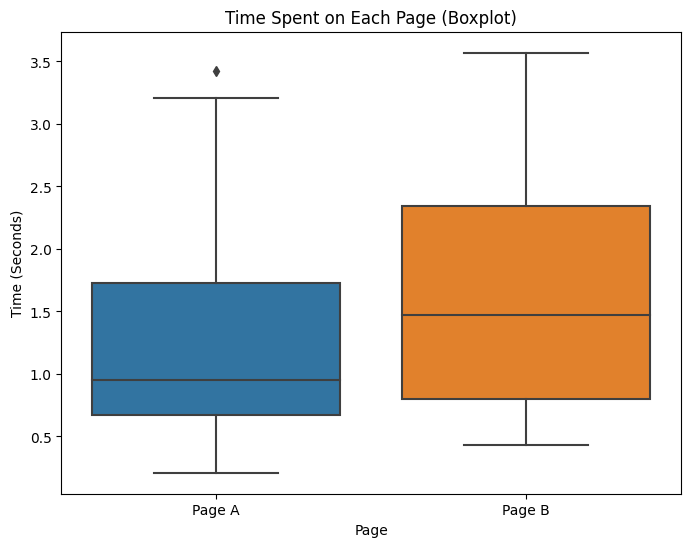

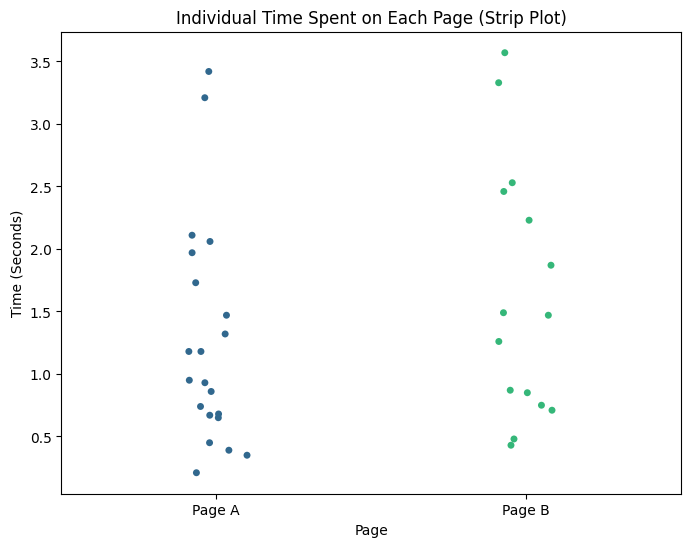

In [171]:
# Boxplot comparing time spent on each page
plt.figure(figsize=(8,6))
sns.boxplot(x='Page', y='Time', data=data)
plt.title('Time Spent on Each Page (Boxplot)')
plt.xlabel('Page')
plt.ylabel('Time (Seconds)')
plt.show()

# Strip plot for a more detailed view of individual points
plt.figure(figsize=(8,6))
sns.stripplot(x='Page', y='Time', data=data, jitter=True, palette="viridis")
plt.title('Individual Time Spent on Each Page (Strip Plot)')
plt.xlabel('Page')
plt.ylabel('Time (Seconds)')
plt.show()

## **Final Interpretation: Mann–Whitney U Test**

After checking the assumptions of normality and equal variances, we determined that the data was not normally distributed for Page A, though Page B was. However, both pages showed equal variances. Because one group violates the assumption of normality, we proceeded with a non-parametric test — the Mann–Whitney U test — which is appropriate for comparing two independent groups when the normality assumption is not met.

## **Test Summary:**
* **Test Used:** Mann–Whitney U Test (non-parametric)
* **U-Statistic:** 119.5
* **P-Value:** 0.2288

## **But Why?**

Although Page B had a higher average time spent (as seen in the descriptive statistics and visualizations), this difference is not statistically significant. Therefore, we do not have enough evidence to conclude that Page B is more effective at engaging users than Page A based on the current sample.